In [2]:
!pip install missingno

You should consider upgrading via the 'C:\Users\INTEL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd 
pd.set_option('display.max_columns', 10) 
pd.set_option('display.max_rows', 10)
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from math import pi # import pi value = 3.74
import seaborn as sns
sns.set_style(style='darkgrid') 
import warnings
warnings.filterwarnings('ignore')
import missingno as msno 

In [4]:
fifa_22 = pd.read_csv("fifa.csv")
fifa_22

,sofifa_id,player_url,short_name,long_name,player_positions,...,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",...,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,...,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",...,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",...,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",...,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,...,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,...,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,...,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,...,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [5]:
fifa_22.shape

(19239, 110)

# Data Cleaning & Manipulation

In [6]:
unnecessary_columns = ['sofifa_id','player_url','long_name','dob','club_loaned_from','nation_position','nation_jersey_number','body_type','real_face','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url','goalkeeping_speed','player_tags','nation_team_id']
fifa_22 = fifa_22.drop(unnecessary_columns, axis=1)
print(fifa_22.columns)

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_joined', 'club_contract_valid_until',
       'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate',
       'release_clause_eur', 'player_traits', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
      

In [7]:
# after filtering
fifa_22.shape

(19239, 93)

In [8]:
fifa_22['BMI'] = round(fifa_22['weight_kg'] / (fifa_22['height_cm']/100) ** 2,2)
fifa_22['BMI']

0        24.91
1        23.67
2        23.74
3        22.20
4        21.37
         ...  
19234    19.75
19235    22.86
19236    22.72
19237    22.05
19238    21.87
Name: BMI, Length: 19239, dtype: float64

In [9]:
#important columns for analysis
columns = ['dribbling','defending','physic','passing','shooting','pace']
fifa_22[columns].isnull().sum()

dribbling    2132
defending    2132
physic       2132
passing      2132
shooting     2132
pace         2132
dtype: int64

In [10]:
# Creating new columns from player position to get all type of position a player plays

new_player_position = fifa_22['player_positions'].str.get_dummies(sep=',').add_prefix('Position')
new_player_position

,Position CAM,Position CB,Position CDM,Position CF,Position CM,...,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,0,0,0,1,0,...,0,0,1,0,0
1,0,0,0,0,0,...,0,0,0,0,1
2,0,0,0,0,0,...,0,0,0,0,1
3,1,0,0,0,0,...,0,0,0,0,0
4,1,0,0,0,0,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19234,0,0,0,0,0,...,0,0,0,0,0
19235,0,0,0,0,0,...,0,0,0,0,0
19236,0,0,0,0,0,...,0,0,0,0,0
19237,0,0,0,0,0,...,0,0,0,0,1


In [11]:
fifa_22 = pd.concat([fifa_22,new_player_position],axis=1)
fifa_22 = fifa_22.drop('player_positions',axis=1)

In [12]:
columns1 = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
fifa_22[columns1].head()

,ls,st,rs,lw,lf,...,lb,lcb,cb,rcb,rb
0,89+3,89+3,89+3,92,93,...,61+3,50+3,50+3,50+3,61+3
1,90+2,90+2,90+2,85,88,...,61+3,60+3,60+3,60+3,61+3
2,90+1,90+1,90+1,88,89,...,60+3,53+3,53+3,53+3,60+3
3,83+3,83+3,83+3,90,88,...,62+3,50+3,50+3,50+3,62+3
4,83+3,83+3,83+3,88,87,...,75+3,69+3,69+3,69+3,75+3


In [13]:
for col in columns1:
    fifa_22[col]=fifa_22[col].str.split('+',n=1,expand=True)[0]
    
fifa_22[columns1]

,ls,st,rs,lw,lf,...,lb,lcb,cb,rcb,rb
0,89,89,89,92,93,...,61,50,50,50,61
1,90,90,90,85,88,...,61,60,60,60,61
2,90,90,90,88,89,...,60,53,53,53,60
3,83,83,83,90,88,...,62,50,50,50,62
4,83,83,83,88,87,...,75,69,69,69,75
...,...,...,...,...,...,...,...,...,...,...,...
19234,44,44,44,46,45,...,48,46,46,46,48
19235,45,45,45,47,46,...,48,44,44,44,48
19236,45,45,45,46,46,...,47,45,45,45,47
19237,47,47,47,47,47,...,32,26,26,26,32


In [14]:
#Checking for null values in columns in columns1

fifa_22[columns1].isnull().sum()

ls     0
st     0
rs     0
lw     0
lf     0
      ..
lb     0
lcb    0
cb     0
rcb    0
rb     0
Length: 26, dtype: int64

In [15]:
fifa_22[columns1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ls      19239 non-null  object
 1   st      19239 non-null  object
 2   rs      19239 non-null  object
 3   lw      19239 non-null  object
 4   lf      19239 non-null  object
 5   cf      19239 non-null  object
 6   rf      19239 non-null  object
 7   rw      19239 non-null  object
 8   lam     19239 non-null  object
 9   cam     19239 non-null  object
 10  ram     19239 non-null  object
 11  lm      19239 non-null  object
 12  lcm     19239 non-null  object
 13  cm      19239 non-null  object
 14  rcm     19239 non-null  object
 15  rm      19239 non-null  object
 16  lwb     19239 non-null  object
 17  ldm     19239 non-null  object
 18  cdm     19239 non-null  object
 19  rdm     19239 non-null  object
 20  rwb     19239 non-null  object
 21  lb      19239 non-null  object
 22  lcb     19239 non-null

In [16]:
#New variable columns2

columns2 = ['dribbling','defending','physic','passing','shooting','pace']
fifa_22[columns2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dribbling  17107 non-null  float64
 1   defending  17107 non-null  float64
 2   physic     17107 non-null  float64
 3   passing    17107 non-null  float64
 4   shooting   17107 non-null  float64
 5   pace       17107 non-null  float64
dtypes: float64(6)
memory usage: 902.0 KB


In [17]:
fifa_22[columns2].isnull().sum()

dribbling    2132
defending    2132
physic       2132
passing      2132
shooting     2132
pace         2132
dtype: int64

In [18]:
for col in columns2:
    fifa_22[col] = fifa_22[col].fillna(fifa_22[col].median())

In [19]:
fifa_22[columns2].isnull().sum()

dribbling    0
defending    0
physic       0
passing      0
shooting     0
pace         0
dtype: int64

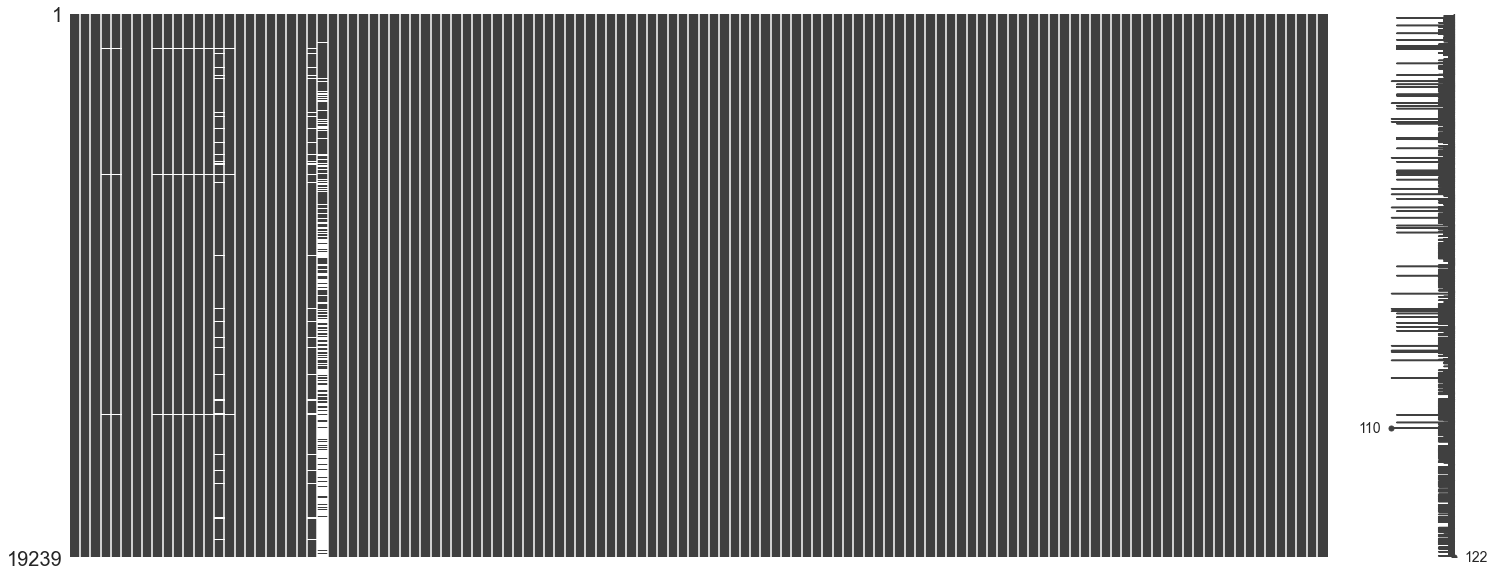

In [20]:
# Null values on whole dataset using (missingno) library and printing matrix plot

msno.matrix(fifa_22);

# DATA ANALYSIS

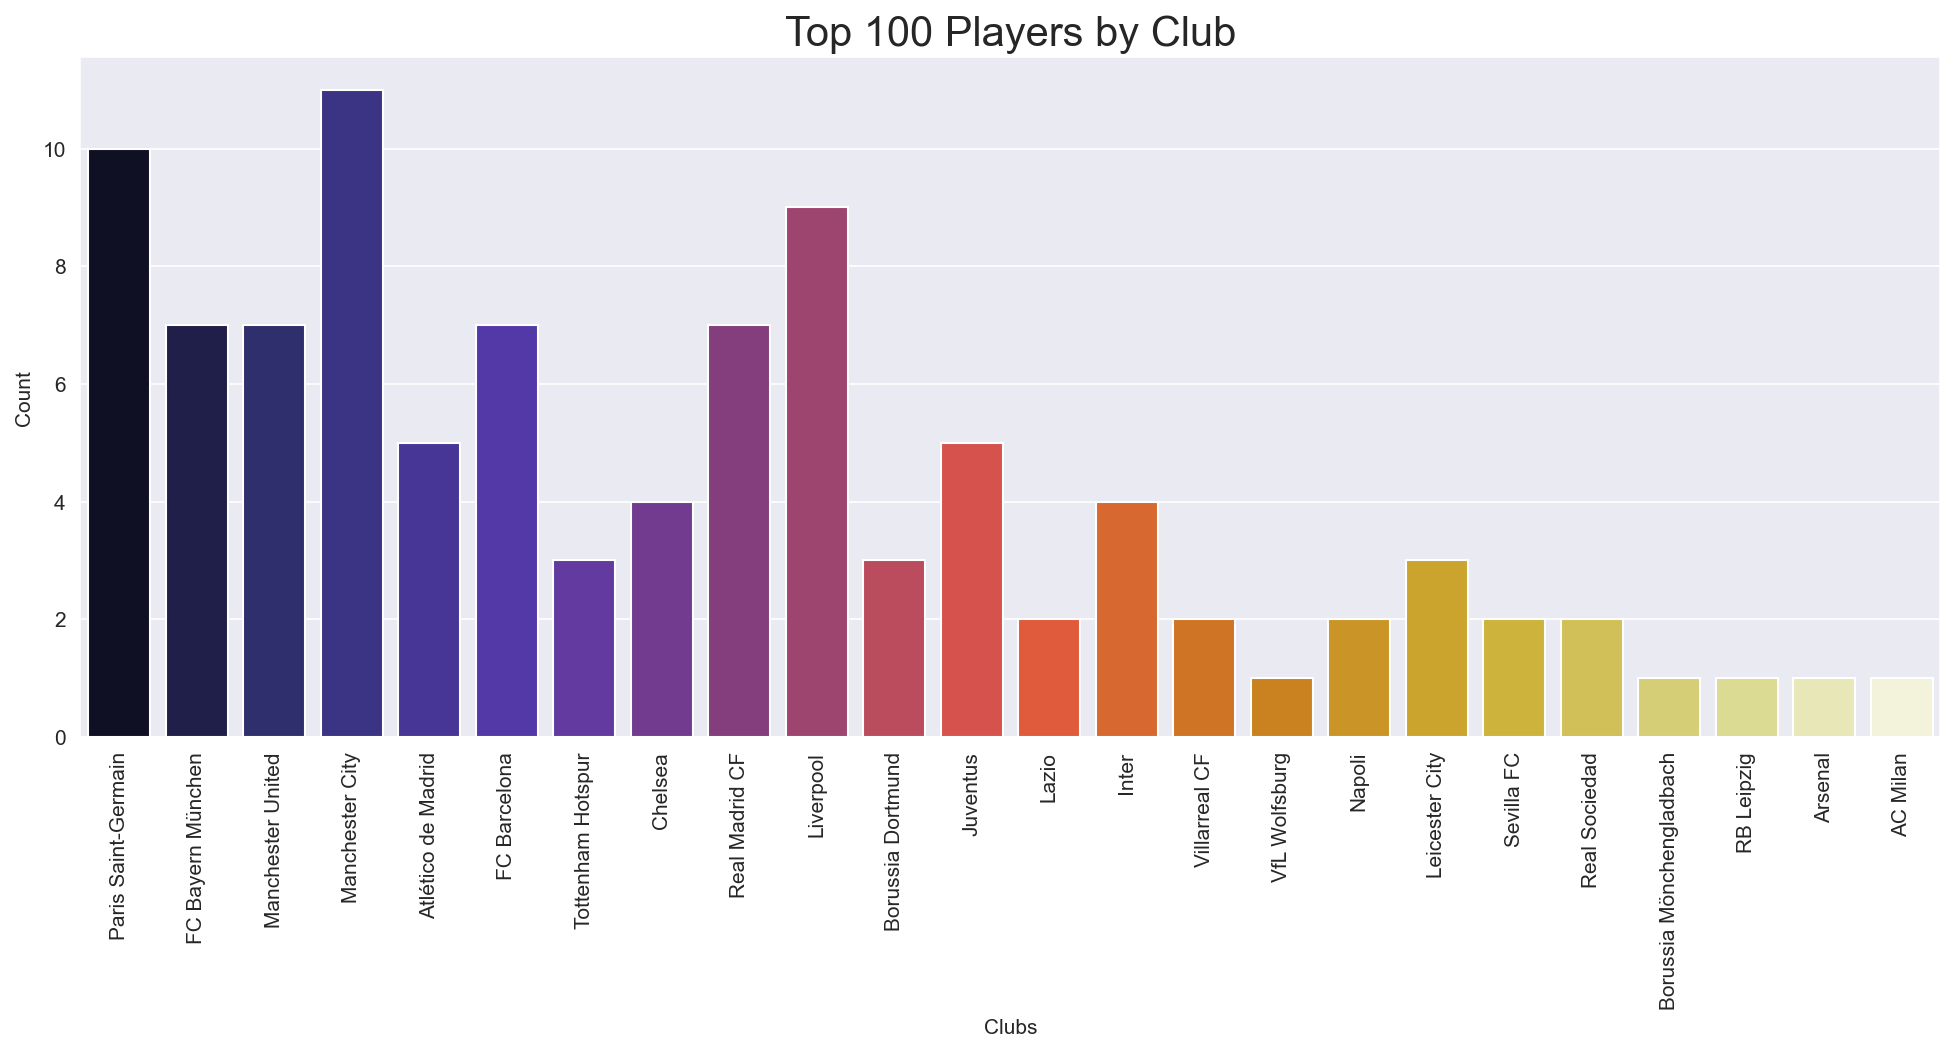

In [29]:
plt.figure(figsize=(16,6),dpi=150)
sns.countplot(x='club_name', data=fifa_22.head(100),palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('Clubs')
plt.ylabel('Count')
plt.title('Top 100 Players by Club', fontsize=20)
plt.show()

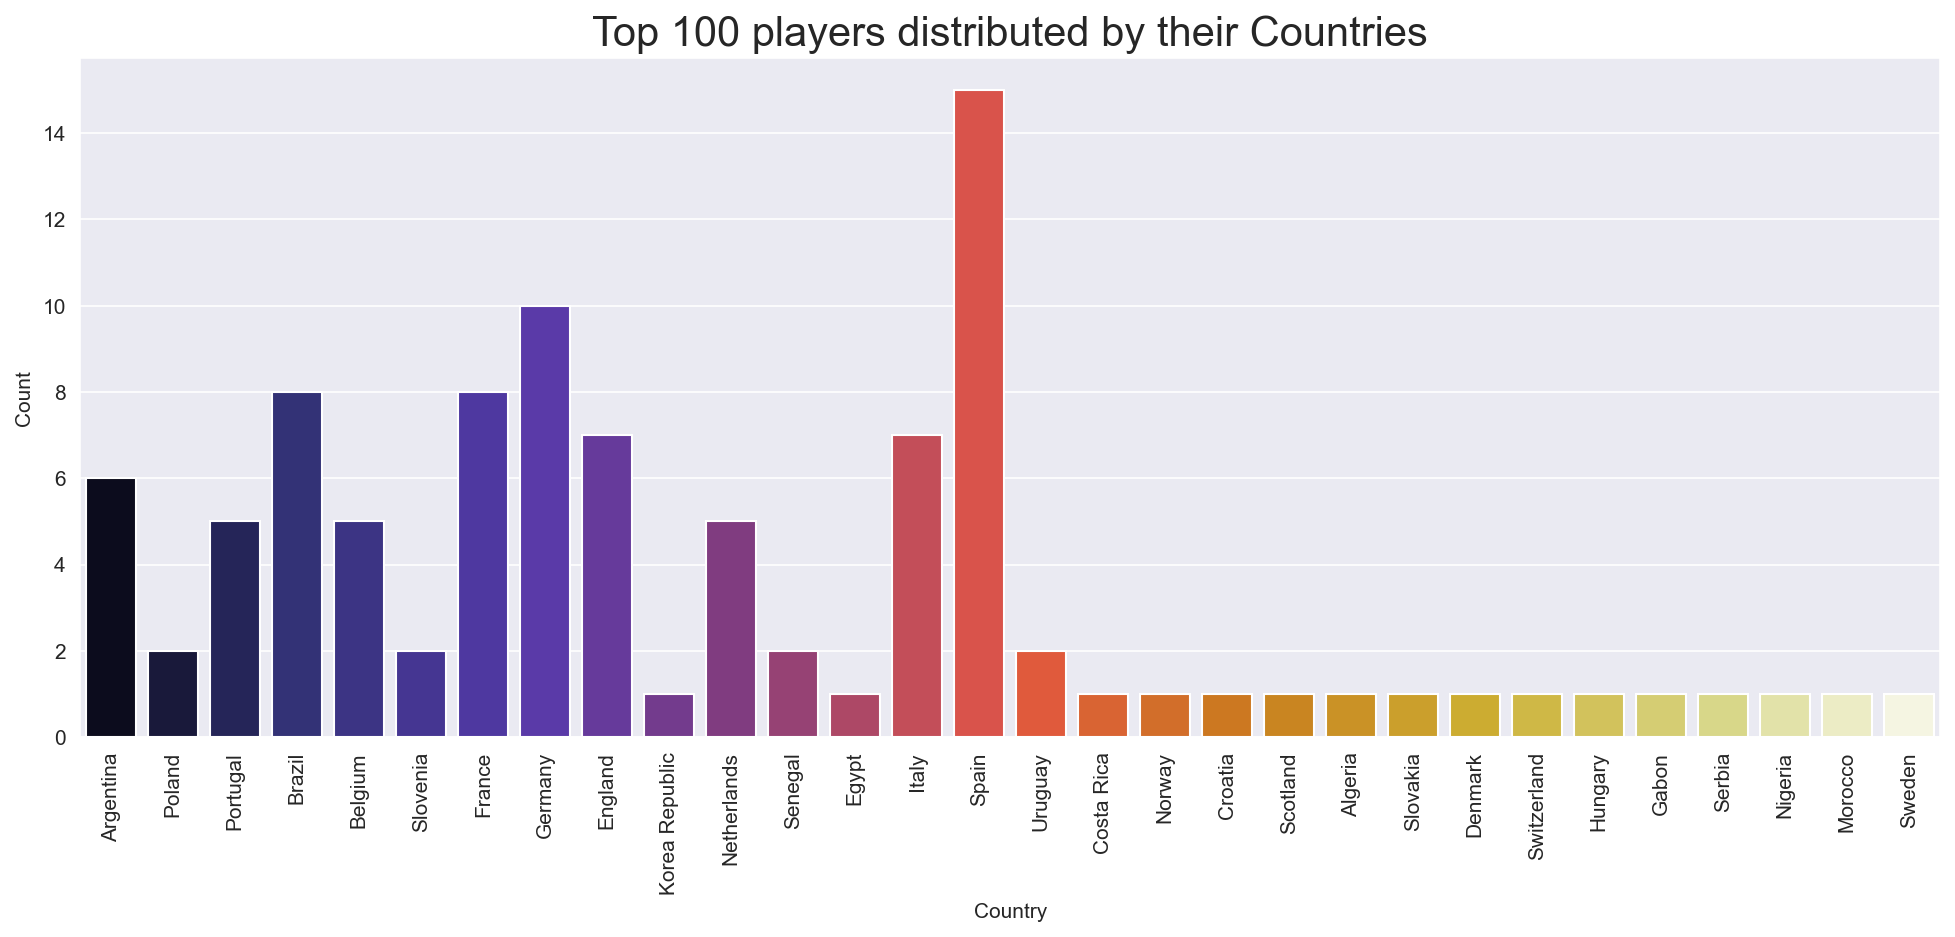

In [26]:
plt.figure(figsize=(16,6),dpi=150)
sns.countplot(x='nationality_name', data=fifa_22.head(100),palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 100 players distributed by their Countries', fontsize=20)
plt.show()

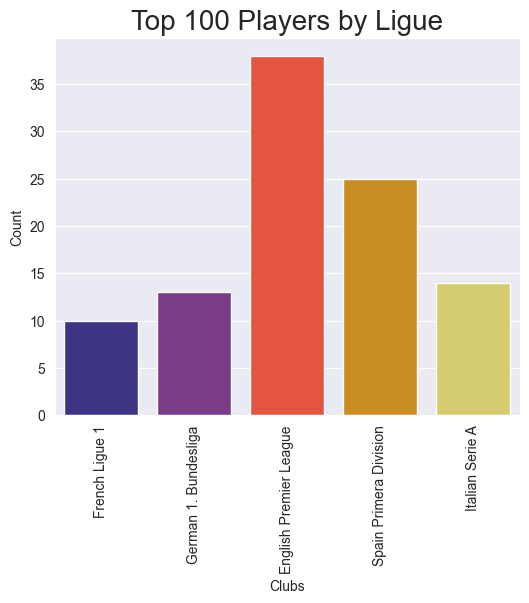

In [28]:
plt.figure(figsize=(6,5),dpi=100)
sns.countplot(x='league_name', data=fifa_22.head(100),palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('Clubs')
plt.ylabel('Count')
plt.title('Top 100 Players by Ligue', fontsize=20)
plt.show()